# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [12]:
using Clustering, CSV, DataFrames, Gadfly

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/lihsuan.hsieh/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [7]:
X = Matrix(data)'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [8]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([1.39682e5 3.20603e5 … 4.50526e5 1.67856e5; 5.58123e5 1.61522e5 … 8.11289e5 3.47813e5], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3.8686e9, 3.78486e9, 8.95693e7, 6.74024e8, 1.97603e9, 6.25825e8, 1.40205e9, 3.61329e6, 4.34537e9, 3.39653e6  …  2.81833e8, 5.89432e9, 2.94826e9, 2.09469e7, 5.55913e9, 1.75454e8, 2.258e8, 7.60021e8, 6.14517e9, 2.74823e8], [346, 340, 375, 335, 636, 327, 325, 328, 225, 341, 351, 297, 351, 89, 334], [346, 340, 375, 335, 636, 327, 325, 328, 225, 341, 351, 297, 351, 89, 334], 1.4333769821768744e13, 9, true)

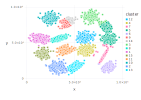

In [14]:
data[!, :cluster] = string.(assignments(result))
plot(data, x="x", y="y", color="cluster", Geom.point)